<center><b>DIGHUM101</b></center>
<center>2-2: Data Visualization</center>

---

# Fast review

1. What are some key components of text preprocessing? 
2. Why is text preprocessing important?

# Learning objectives

1. Learn some theory and best practices of data visualization.
2. Make a matplotlib histogram, barplot, boxplot, and scatterplot.
3. Optionally, begin to read Claus O. Wilke's [Fundamentals of Data Visualization](https://serialmentor.com/dataviz/)

In [11]:
import pandas as pd

# Import matplotlib (https://en.wikipedia.org/wiki/Matplotlib)
import matplotlib

# (https://www.quora.com/What-is-the-difference-between-Python-modules-packages-libraries-and-frameworks)
# Import matplotlib.pyplot and assign it to an alias `plt`
import matplotlib.pyplot as plt

# Import seaborn as assign to an alias `sns`
import seaborn as sns

💡 **Tip**: `pyplot` is a collection of command style functions that make matplotlib work like MATLAB and save many lines of repeated code. By convention, `pyplot` is aliased to `plt`, which we just did in the above import cell. 

In [ ]:
# You can also change the default style of matplotlib plots

# Indicate the template to use for the plot (not required)
plt.style.use('seaborn-v0_8-bright')

In [ ]:
# Run plt.style.available to experiment with different styles
plt.style.available

## When to use each package

`matplotlib`:
- Versatile (basic and complex plots)
- Foundation of using other packages
- Lengthy syntax
- Ideal for customization
- Not ideal for presentation and publication

`pandas`:
- Plot basic plots
- Handy to use for Exploratory Data Analysis (EDA)
- Well connected with `pandas`
- Not ideal for custimization

`seaborn`:
- Easier for complex plots 
- Shorter syntax
- Require knowledge of reading documentation
- Well connected with `pandas`
- Ideal for customization and presentation

## What is Data Visualization?

Data visualization is an art and a science of transforming data into meaningful visual stories, where your choices in design—from labels to color—can reveal insights or obscure them.

As with any art or science, it begins with understanding foundational principles and learning from examples that illustrate what is possible, what is effective, and how our choices shape what we see and understand.

We can look at some examples in [Python Graph Gallery](https://python-graph-gallery.com/) and in [Seaborn's Example Gallery](https://seaborn.pydata.org/examples/index.html)

<a id='section1'></a>

# Principles of Data Visualization

Visualization is meant to convey information.

> The power of a graph is its ability to enable one to take in the quantitative information, organize it, and see patterns and structure not readily revealed by other means of studying the data.

\- Cleveland and McGill, 1984

That said, to accurately and efficiently communicate the information hidden within the data, we should also be aware of the common pitfalls of data visualization.

It's always good to sit back and ask ourseleves:
- Does the plot include sufficient text descriptions (e.g. labels, legend, and title)?
- Does the plot has an approriate size and scale?
- Does the plot contain too much or too little data?
- Does the plot include a common scale for group comparison?
- And does the chosen color contrast accurately convey the differences?

The answers to these questions vary depending on the data we have and the message we want to convey through the plot.

Throughout the class meeting, we will discuss the decisions we need to make when encountering such questions, as well as the solutions to address them.

# Theory of Data Visualization

Certain techniques make that information easier to interpret and understand. In their 1984 paper titled, "[Graphical Perception: Theory, Experimentation, and Application to the Development of Graphical Methods](https://www-jstor-org.libproxy.berkeley.edu/stable/2288400?seq=1#page_scan_tab_contents)," Cleveland and McGill identify 10 elementary perceptual tasks that are used to "extract quantitative information from graphs." Their premise is:

> A graphical form that involves elementary perceptual tasks that lead to more accurate judgments than another graphical form (with the same quantitative information) will result in better organization and increase the chances of a correct perception of patterns and behavior.

Whereas graph design had, up to that point, been "largely unscientific," Cleveland and McGill took a systematic approach in analyzing human graphical perception through experimentation. Their researched helped identify the most and least accurate elementary perceptual tasks, ordered below:

1. Position along a common scale
2. Position along non-aligned scales
3. Length, direction, angle
4. Area
5. Volume, curvature
6. Shading, color saturation

In 2010, [Heer and Bostock](http://vis.stanford.edu/files/2010-MTurk-CHI.pdf) confirmed these results using Amazon's Mechanical Turk.

Let's take a look at a few examples. Because we're only interested in relative sizes, we don't include a legend with size information or reference points.

![circles](../img/circles.png)

For circles of distinctly different sizes, the comparison is simple. For example, "A" is smaller than "B." However, for circles, such as "L" and "M," that are almost the same size, it's difficult to tell which is smaller. Area, according to Cleveland and McGill's research, is less accurate than, say, length, which we consider next.

![circles](../img/bars.png)

Focusing on "L" and "M," it is clear to see which is larger. You might be wondering whether scale makes a difference&mdash;that is, if the small circle sizes make it difficult to compare&mdash;it doesn't.

Next, we consider a case where we want to plot two series. For this example, let's suppose we're working with student English and Math test scores. Here, we'll want to use bars, which we arbitrarily label Z-L. The question is, which bars should we use? This is a case where the answer depends on what we're trying to communicate. If we're interested in showing total scores, we could use a stacked bar chart.

![circles](../img/two-series-0.png)

We can tell that "Y" and "L" had the highest cumulative scores. What if we want to know which students scored highest on the math exam? Because the math portions of each bar are stacked on top of the English scored (they are on "non-aligned scales," as Cleveland and McGill call it), it's difficult to tell. One solution is to plot these on opposite sides of the x-axis.

![circles](../img/two-series-1.png)

Now, it's easier to see that "R" scored quite well on the math exam. The tradeoff with this layout is that it's difficult to compare cumulative scores. Comparing "Z" and "O," for example, is a challenge. Again, it depends on what the message is.

These findings are a *guide* for what works when the goal is to make accurate judgments. Sometimes, however, the goal might not be to allow for precise comparisons but, rather, to facilitate the perception of larger patterns.

## Form and Function

> A good graphic realizes two basic goals: It **presents** information, and it allows users to **explore** that information.

\- Alberto Cairo

> A data visualization should only be beautiful when beauty can promote understanding in some way without undermining it in another. Is beauty sometimes useful? Certainly. Is beauty always useful? Certainly not.

\- Stephen Few

> Good displays of data help to reveal knowledge relevant to understanding mechanism, process and dynamics, cause and effect.

\- Edward Tufte

A figure is ineffective if it "wastes too much real estate (and the designer's time) on things that don't help readers understand [it]." - Alberto Cairo

> The important criterion for a graph is not simply how fast we can see a result; rather it is whether through the use of the graph we can see something that would have been harder to see otherwise or that could not have been seen at all.

\- William Cleveland

> [A]lways take advantage of the space you have available to seek depth within reasonable limits. After that, *and only after that*, worry about how to make the presentation prettier.

\- Alberto Cairo

Ultimately, identify your audience and their needs and interests. The same data should be visualized differently for a scientific publication versus a magazine.

## Dataset

Remember we looked at this dataset last week? 

We've decided to use the so-called Gapminder dataset, which was compiled by Jennifer Bryan. This dataset contains several key demographic and economic statistics for many countries, across many years. For more information, see the [gapminder](https://github.com/jennybc/gapminder) repository.

In [19]:
# Load the gapminder dataset
# Notice we did not set our working directory first - what did we do instead?
gap = pd.read_csv("../Data/gapminder-FiveYearData.csv")

In [20]:
print(gap.shape)
gap.head()

(1704, 6)


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [21]:
gap.dtypes

country       object
year           int64
pop          float64
continent     object
lifeExp      float64
gdpPercap    float64
dtype: object

Note that the "int64" and "float64" data types refer to the amount of memory taken up by each variable. The size of these data types in Pandas matters only if you are using very large datasets.

# Histogram

Histograms plot a discretized distribution of a one-dimensional dataset across all the values it has taken. They visualize how many of the data points are in each of $b$ bins, each of which has a pre-defined range.

Use a histogram when you would like to visualize the distribution of a single float or integer variable. 

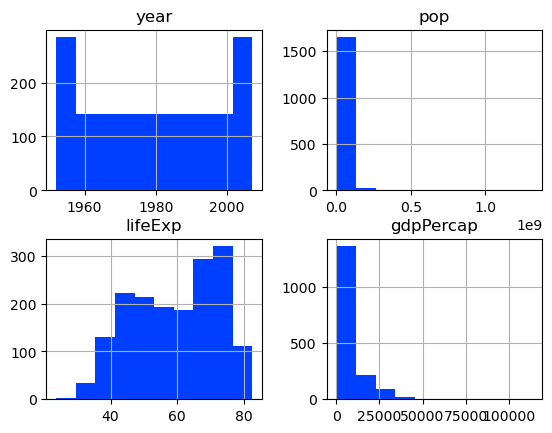

In [22]:
# Note the semicolon, which tells Jupyter not to print additional output about the plot
gap.hist();

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'pop'}>],
       [<Axes: title={'center': 'lifeExp'}>,
        <Axes: title={'center': 'gdpPercap'}>]], dtype=object)

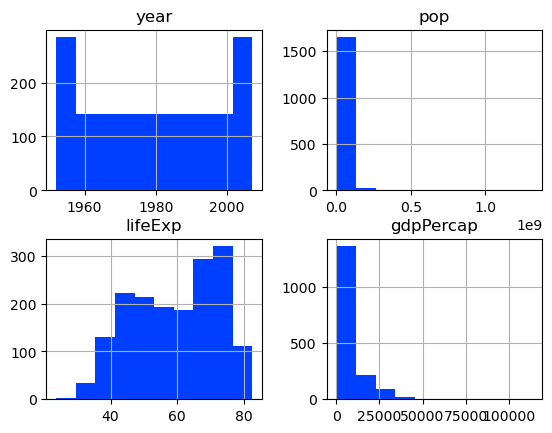

In [ ]:
# This is the additional information btw
gap.hist()

### We can also adjust the figure size.

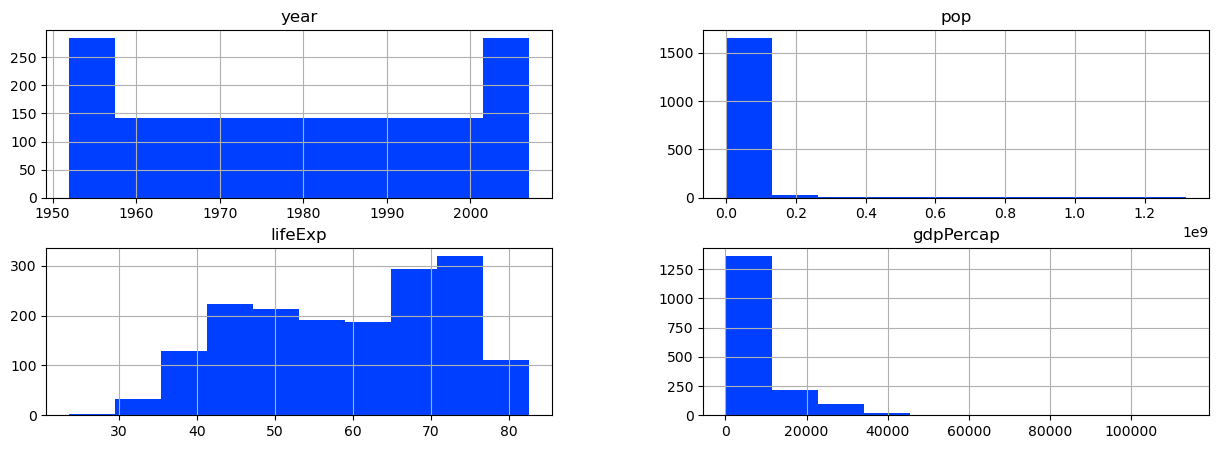

In [23]:
gap.hist(figsize = (15, 5)); # width, height

### Change the number of bins

Bins are like intervals in which to break up the distribution of data. Say we want a "higher resolution" than the plots above:

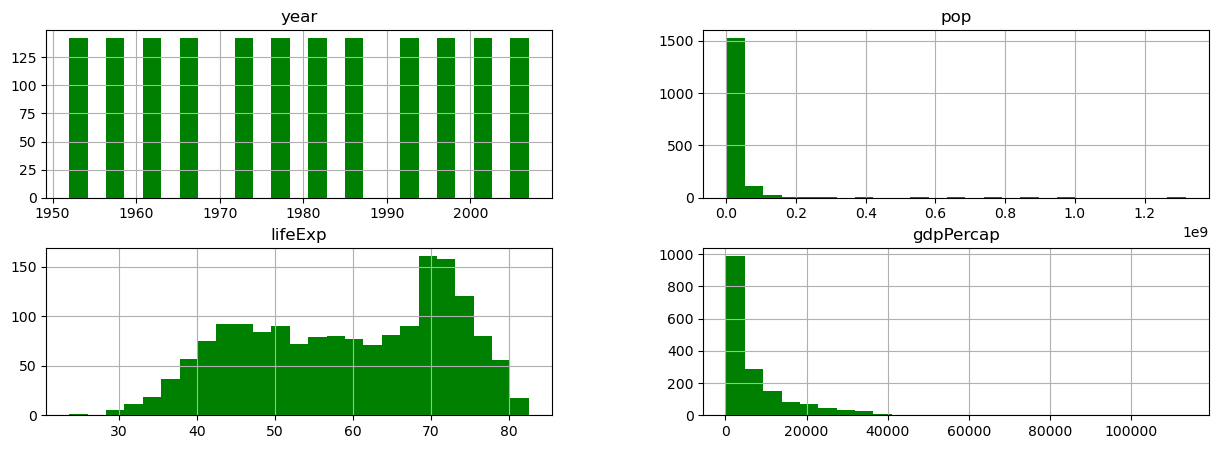

In [24]:
gap.hist(bins = 25, figsize = (15, 5), color = "green");

### Plot a single variable

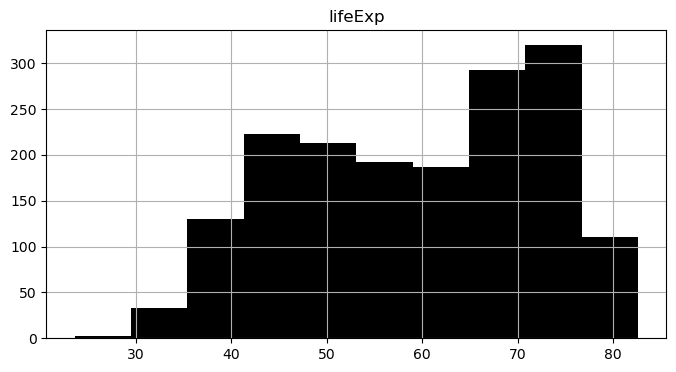

In [26]:
gap.hist(column = "lifeExp", figsize = (8, 4), color = "black");

We can use these visualizations as a starting point for further analysis. For instance, we see that a few country/year combinations have a very low life expectancy. Let's have a closer look using `sort_values()`:

In [33]:
gap.sort_values(by='lifeExp', ascending=True)

,country,year,pop,continent,lifeExp,gdpPercap
1292,Rwanda,1992,7290203.0,Africa,23.599,737.068595
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
552,Gambia,1952,284320.0,Africa,30.000,485.230659
36,Angola,1952,4232095.0,Africa,30.015,3520.610273
1344,Sierra Leone,1952,2143249.0,Africa,30.331,879.787736
...,...,...,...,...,...,...
1487,Switzerland,2007,7554661.0,Europe,81.701,37506.419070
695,Iceland,2007,301931.0,Europe,81.757,36180.789190
802,Japan,2002,127065841.0,Asia,82.000,28604.591900
671,Hong Kong China,2007,6980412.0,Asia,82.208,39724.978670


💡 **Tip**: We are now jumping ahead a little and using a bar plot. We could have created a histogram from this data, but it is not the right choice for what we would like to show here. Histograms are typically used for continuous data to show the distribution of a variable, whereas our example is about showing the top 10 countries with the lowest life expectancy, which is a discrete data set.

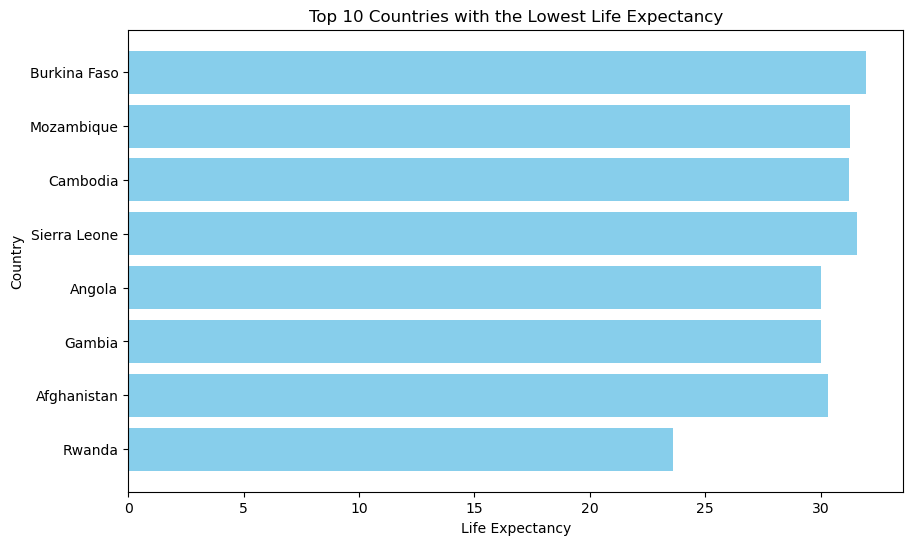

In [34]:
# Let's plot the top 10 countries with the lowest life expectancy

top_10_lowest = gap.sort_values(by='lifeExp', ascending=True).head(10)

# Plot a horizontal bar chart for the top 10 lowest life expectancies
plt.figure(figsize=(10, 6))
plt.barh(top_10_lowest['country'], top_10_lowest['lifeExp'], color='skyblue')
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Lowest Life Expectancy')
plt.show()

### Let's find the issues with the previous example.

Hint 1: How many data points are in our plot? How many did we expect?

Hint 2: What is the difference in data points between the data frame and the plot?


### Countries are repeated in this dataset! 

Remember last week, when we talked about this data, we saw that the statistics are reported 12 times, as in for 12 different years, for each country?

A more meaningful way to compare the population statistics across different countries would be to do it by year.

In [36]:
# Let's subset our data to only include the latest year
latest_year = gap['year'].max()
latest_year

2007

In [45]:
gap_2007 = gap[gap['year'] == latest_year]
gap_2007.head(10)

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
71,Australia,2007,20434176.0,Oceania,81.235,34435.367440
83,Austria,2007,8199783.0,Europe,79.829,36126.492700
95,Bahrain,2007,708573.0,Asia,75.635,29796.048340
107,Bangladesh,2007,150448339.0,Asia,64.062,1391.253792
119,Belgium,2007,10392226.0,Europe,79.441,33692.605080


In [43]:
# Let's double check that we did the subsetting correctly

print('Number of unique countries in the entire dataset:', gap['country'].nunique())
print('Number of rows in the 2007 subset:', gap_2007.shape[0])

Number of unique countries in the entire dataset: 142
Number of rows in the 2007 subset: 142


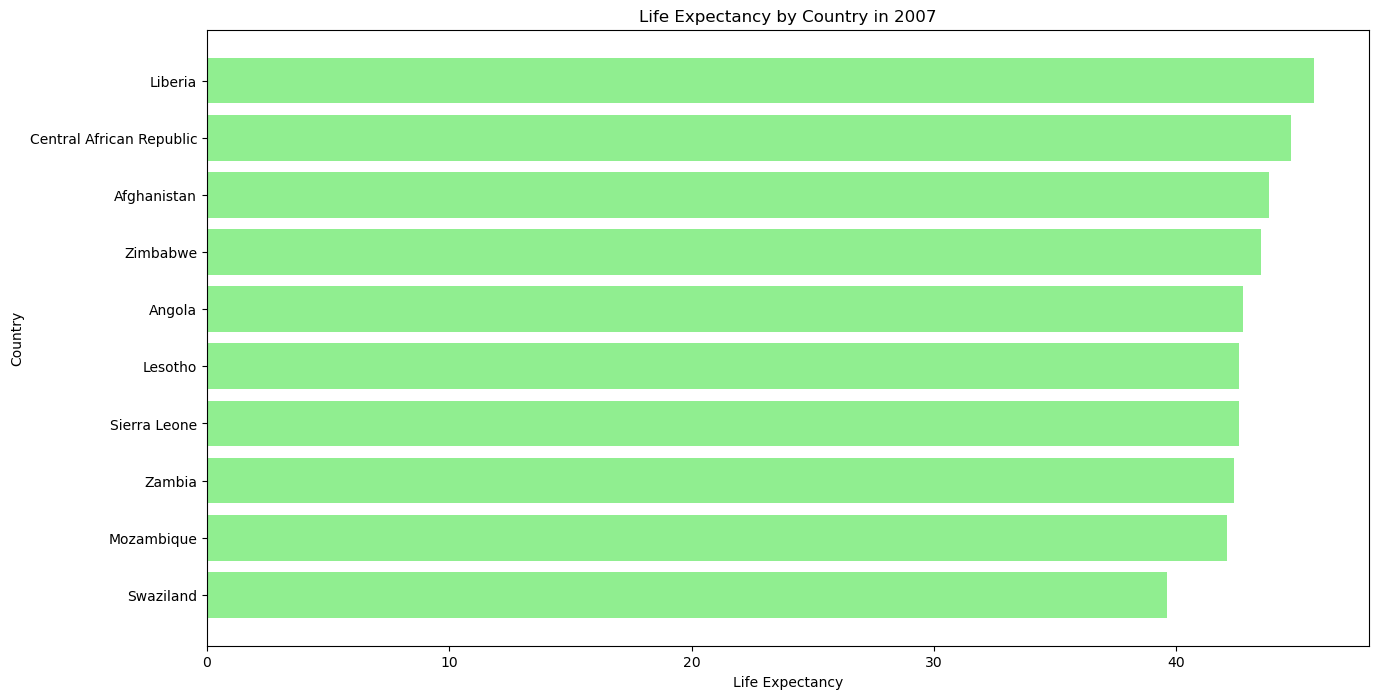

In [46]:
# Now we can plot the life expectancy for each country in 2007, in ascending order
top_10_lowest_2007 = gap_2007.sort_values(by='lifeExp', ascending=True).head(10)

# Plot a horizontal bar chart for life expectancy in 2007
plt.figure(figsize=(15, 8))
plt.barh(top_10_lowest_2007['country'], top_10_lowest_2007['lifeExp'], color='lightgreen')
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.title('Life Expectancy by Country in 2007')
plt.show()

### Let's see one more histogram example

We will now plot the GDP for each country in 2007. The GDP data is a perfect starting point for us to try out histograms as we'll be able to visualize the distribution of GDP across countries.

Also, this time we will focus on the differences between the three libraries we can use for histograms: matplotlib, pandas, seaborn

### matplotlib

Syntax: call the **library** (`plt`), followed by the **plot type**: (`.hist()`): `plt.hist()`

Let's take a look at the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for `plt.hist()` together. The input value that the function takes should be an array, so we pass in the `gdpPercap` column to the function. As a generic plotting method, the function `plt.hist()` itself is not specific to the data we are plotting, so we need to pass in the data we want to plot.

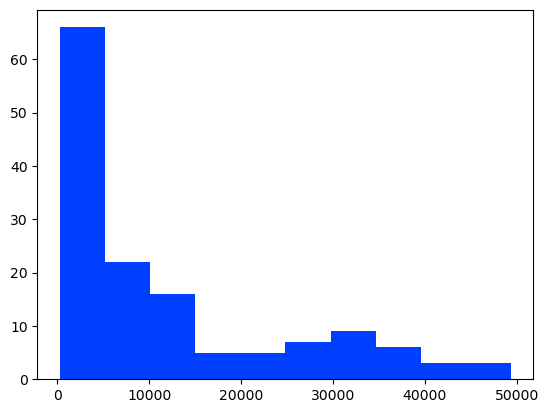

In [73]:
# default bin size: 10
plt.hist(gap_2007['gdpPercap']);

Each line in the histogram represents a bin. The height of the line corresponds to the number of items (countries in this case) within the range of values covered by the bin. In the previous plots, we used the default number of bins (10). Now, let's increase the number of bins by specifying the `bins=30` parameter.

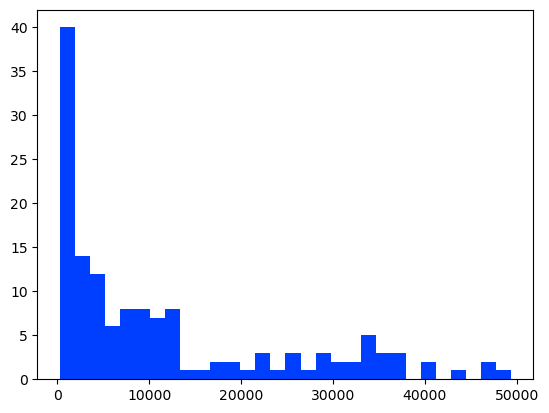

In [75]:
plt.hist(gap_2007['gdpPercap'], bins=30);

This histogram tells us that many of the countries had a low GDP, which was less than 5,000. There is also a second "bump" in the histogram around 30,000. This type of distribution is known as **bi-modal**, since there are two modes, or common values.

To make this histogram more interpretable let's add a title and labels for the x and y axes. We'll pass strings to `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to do so.

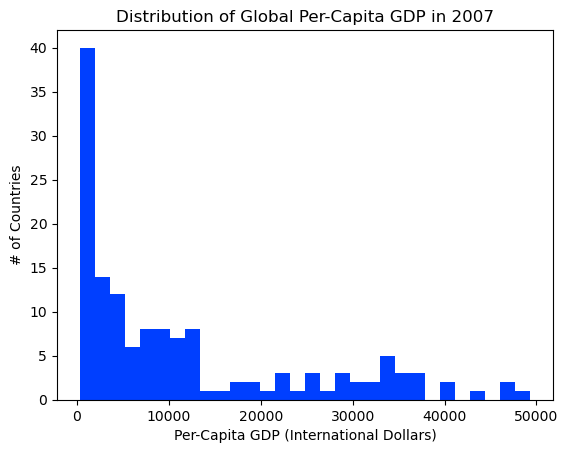

In [76]:
plt.hist(gap_2007['gdpPercap'], bins=30)

plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

### pandas

Syntax: call the **dataframe** (`gap_2007`), followed by the plot type (`.hist()`): `gap_2007.hist()`

Let's take a look at [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) of `pd.hist()`. The required input value is a column of a dataframe. We no longer need to select the column using square brackets; instead, we simply pass the name of the column to the column parameter. This highlights how `pandas` differs from `matplotlib`. The function `pd.hist()` is not intended to be a generic plotting method; rather, it is specific to the dataframe where the data comes from. 

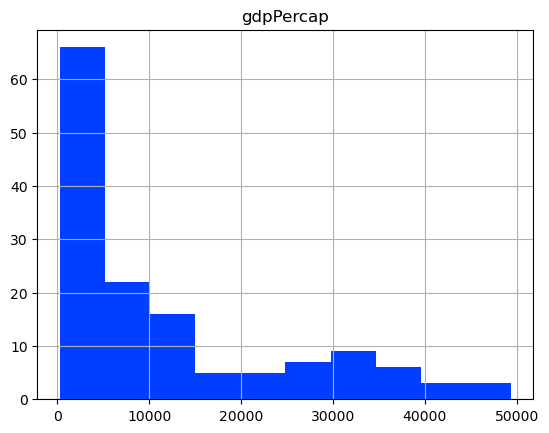

In [77]:
gap_2007.hist(column='gdpPercap');

We can remove the grid by specifying `grid=False`; to make the plot complete, let's add the title and labels. 

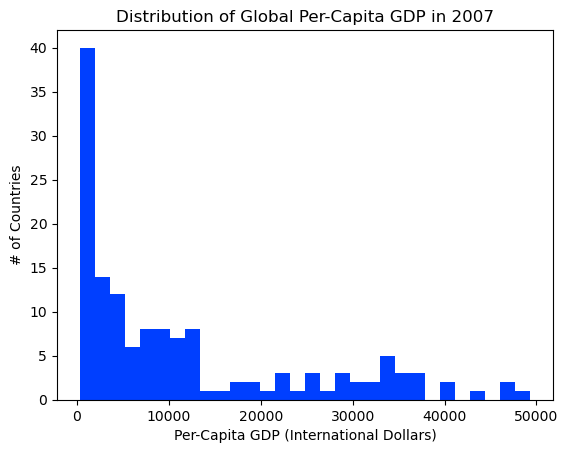

In [78]:
gap_2007.hist(column='gdpPercap', bins=30, grid=False)

plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

### seaborn

Syntax: call the **library** (`sns`), followed by the plot type (`.histplot()`): `sns.histplot()`

Let's check out the [documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html) of `sns.histplot()`. A `seaborn` plotting function typically requires two things: the dataframe and the specific subset of the data we want to plot. In this case, we pass `gap_2007` to the `data` parameter to indicate that the GDP data we want to plot comes from the `gap_2007` dataframe. We then specify `x='gdpPercap'` to indicate that the column we want to plot is `gdpPercap`. Now you can see that `sns.histplot()` is still a generic plotting function, but it integrates well with `pandas`.

### On a more general note:

Seaborn is a a library built on top of matplotlib and integrates closely with pandas data structures. It has three basic level graphing methods: `relplot()`, `distplot()` and `catplot()`, which each has a number of submethods which are basically shorthands for the main methods.

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

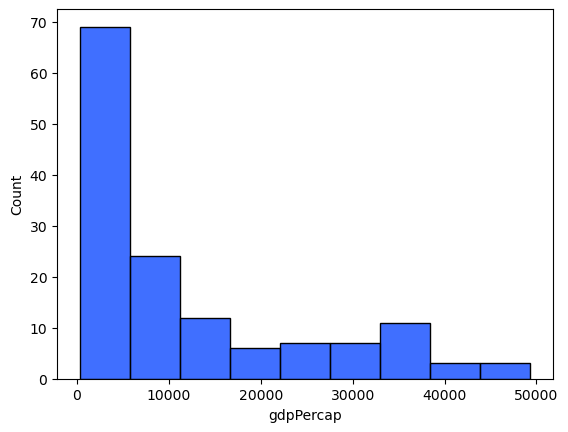

In [79]:
sns.histplot(data=gap_2007, x='gdpPercap');

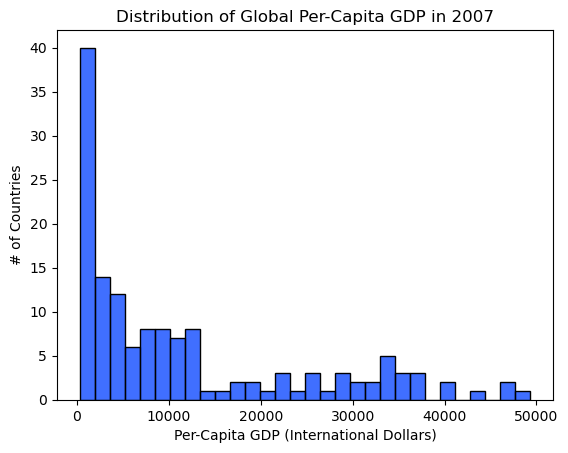

In [80]:
sns.histplot(data=gap_2007, x='gdpPercap', bins=30)

plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

Now we have known the basic syntax of each plotting library. What's your favourite one? 

In this course, we will mainly use `seaborn` to visualize all kinds of plots. Importantly, it should be noted that `seaborn` is built on top of `matplotlib`; behind the scene, `seaborn` uses matplotlib to draw plots but it provides users a high-level interface that is easier to learn and interact.  

## Kernal Density Plot

Histograms represent the distribution with discrete bins. A similar method is called Kernel Density Plot (KDE), which visualizes the distribution with a continuous probability density curve. KDE can be plotted independently; quite frequently, it is overlaid with histograms. In Seaborn, achieving this is straightforward by enabling the `kde` parameter and simply setting it to `True`.

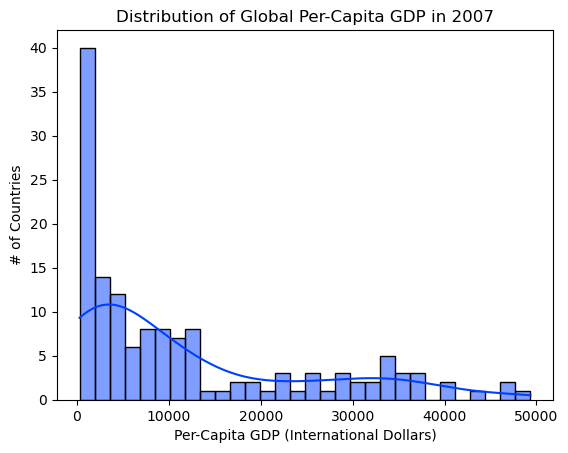

In [81]:
sns.histplot(data=gap_2007, 
             x='gdpPercap', 
             bins=30, 
             kde=True)

plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

# Bar Plot

You can use a bar plot when you want to illustrate differences in frequencies of some category. Let's look at the 12 most frequent words in "jordan2013.txt"

In [55]:
jordan = open("../Data/human-rights/jordan2013.txt", 
              encoding = "utf-8").read()
print(len(jordan.split()))
print(jordan[0:500])

11349

Distr.: General 6 January 2014 
Original: English 
General Assembly 
Human Rights Council Twenty-fifth session 
Agenda item 6 
Universal periodic review 

Report of the Working Group on the Universal Periodic Review* 
Jordan 
* The annex to the present report is circulated as received. 

GE.14-10063 
*1410063* 
Contents 
Paragraphs Page 
Introduction............................................................................................................. 1Ð4 3 
I. Summary of the proceedings 


In [48]:
from collections import Counter

In [49]:
# Tokenize jordan.txt into single words
jordan_tokens = jordan.split()
print(jordan_tokens[0:25])

['Distr.:', 'General', '6', 'January', '2014', 'Original:', 'English', 'General', 'Assembly', 'Human', 'Rights', 'Council', 'Twenty-fifth', 'session', 'Agenda', 'item', '6', 'Universal', 'periodic', 'review', 'Report', 'of', 'the', 'Working', 'Group']


In [50]:
# Count the 12 most common words
jordan_freq = Counter(jordan_tokens)
jordan_barplot = jordan_freq.most_common(12)
jordan_barplot

[('the', 901),
 ('of', 630),
 ('and', 550),
 ('to', 436),
 ('in', 221),
 ('It', 148),
 ('on', 124),
 ('for', 109),
 ('with', 99),
 ('rights', 98),
 ('that', 83),
 ('made', 82)]

In [51]:
# Convert to data frame
jordan_df = pd.DataFrame(data = jordan_barplot, 
                         columns = ["Word", "Frequency"])
jordan_df

,Word,Frequency
0,the,901
1,of,630
2,and,550
3,to,436
4,in,221
5,It,148
6,on,124
7,for,109
8,with,99
9,rights,98


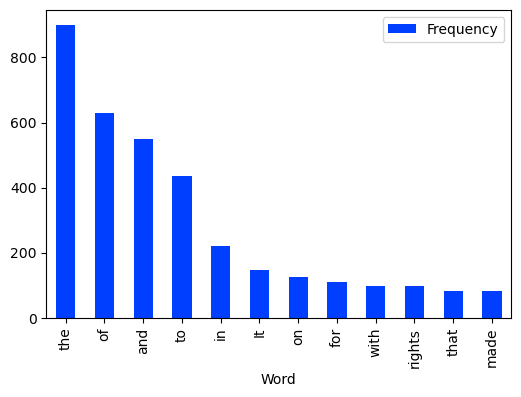

In [52]:
# Plot it! Tip: check TAB while scrolling over "barh" to see other chart types you could use.
jordan_df.plot.bar(x = "Word", y = "Frequency", figsize = (6,4));

# another way of doing this: using attributes
# jordan_df.plot(kind="bar", x = "Word", y = "Frequency", figsize = (6,4));

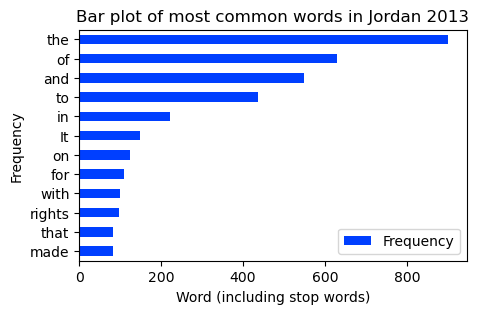

In [ ]:
# Change x and y axis labels; add title; change to horizontal bar chart; invert y-axis
jordan_df.plot.barh(x = "Word", y = "Frequency", figsize = (5,3)).invert_yaxis()
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Bar plot of most common words in Jordan 2013");

### What does this plot tell us really? 

Hint: Think of what you learnt about this text that is upwards of 11k words by only looking at this plot

### You guessed it right, the issue was stopwords

Let's clean this up a bit and plot it again

In [56]:
# Let's start with lowercasing everything
jordan_lower = jordan.lower()


In [60]:
# Remove punctuation and stopwords
from string import punctuation

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mervetekgurler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
for char in punctuation:
    jordan_lower = jordan_lower.replace(char, "")

In [ ]:
# Let's see what this did
print(jordan[0:500])


Distr.: General 6 January 2014 
Original: English 
General Assembly 
Human Rights Council Twenty-fifth session 
Agenda item 6 
Universal periodic review 

Report of the Working Group on the Universal Periodic Review* 
Jordan 
* The annex to the present report is circulated as received. 

GE.14-10063 
*1410063* 
Contents 
Paragraphs Page 
Introduction............................................................................................................. 1Ð4 3 
I. Summary of the proceedings 


In [62]:
print(jordan_lower[0:500])


distr general 6 january 2014 
original english 
general assembly 
human rights council twentyfifth session 
agenda item 6 
universal periodic review 

report of the working group on the universal periodic review 
jordan 
 the annex to the present report is circulated as received 

ge1410063 
1410063 
contents 
paragraphs page 
introduction 1ð4 3 
i summary of the proceedings of the review process 5ð117 3 
a presentation by the state under review 5ð25 3 
b interactive dialogue and responses by t


In [67]:
# Let's tokenize again and remove stopwords
jordan_tokens_cleaned = [word for word in jordan_lower.split() if word not in stop_words]
print(jordan_tokens_cleaned[0:25])


['distr', 'general', '6', 'january', '2014', 'original', 'english', 'general', 'assembly', 'human', 'rights', 'council', 'twentyfifth', 'session', 'agenda', 'item', '6', 'universal', 'periodic', 'review', 'report', 'working', 'group', 'universal', 'periodic']


### List Comprehension

What we did above was list comprehension. For some coding tasks, there are many ways to solve the same problem. They all offer different advantages and sometimes disadvantages.

We could have repeated the code above to create a list of token first and then removed stopwords while counting them to create a df of word frequencies. 

Instead we created a list and cleaned the stopwords while creating it.

Even here, we could have done a for loop instead of list comprehension. They are equivalent in this case. Let's take a closer look:

```python
jordan_tokens_cleaned = [word for word in jordan_lower.split() if word not in stop_words]
```

VS


```python
jordan_tokens_cleaned = []
jordan_lower_tokens = jordan_lower.split()
for token in jordan_lower_tokens:
    if token not in stop_words:
        jordan_tokens_cleaned.append(token)
```



In [69]:
# Let's count the most common 12 words again
jordan_freq_cleaned = Counter(jordan_tokens_cleaned)
jordan_barplot_cleaned = jordan_freq_cleaned.most_common(12)
jordan_barplot_cleaned

[('rights', 158),
 ('women', 127),
 ('human', 95),
 ('jordan', 91),
 ('made', 85),
 ('recommendations', 78),
 ('law', 72),
 ('efforts', 69),
 ('national', 51),
 ('ensure', 50),
 ('continue', 50),
 ('protection', 49)]

In [70]:
# Convert to data frame
jordan_df_cleaned = pd.DataFrame(data = jordan_barplot_cleaned, 
                         columns = ["Word", "Frequency"])
jordan_df_cleaned

,Word,Frequency
0,rights,158
1,women,127
2,human,95
3,jordan,91
4,made,85
5,recommendations,78
6,law,72
7,efforts,69
8,national,51
9,ensure,50


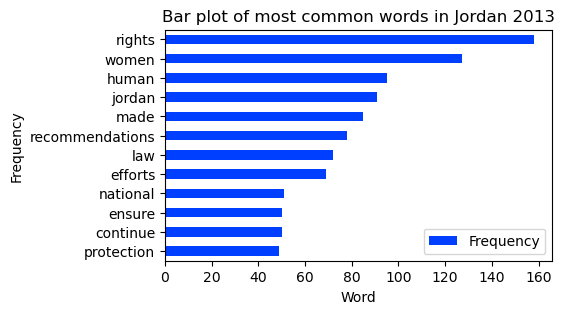

In [71]:
# Let's plot the 12 most common words again
jordan_df_cleaned.plot.barh(x = "Word", y = "Frequency", figsize = (5,3)).invert_yaxis()
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Bar plot of most common words in Jordan 2013");

### Doesn't this give us a better understanding of the contents of this document?

Some other directions we could have taken include lemmatization to make sure 'recommendations' and 'recommendation' count as the same. We could have also removed jordan and related words like jordanian because we know that this document is about jordan

# Box plot

A boxplot - also called a box and whisker plot — displays the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages. This includes the minimum, first quartile, median, third quartile, and maximum.

In a box plot, we draw a box from the [first quartile to the third quartile](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review). A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

Use boxplots when you want to illustrate variation in a single float or integer, and to identify outliers.

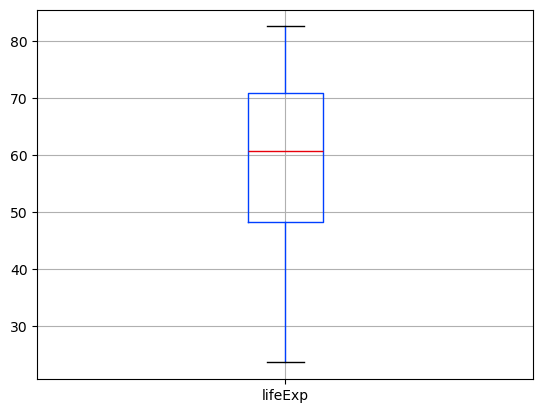

In [72]:
# For the entire dataset...
gap.boxplot(column=["lifeExp"]);

The led line above is the median value in the data; the bottom and top of the box are the first and third quartiles.

Let's make boxplots of life expectancy **_by_** continent in the gapminder dataset.

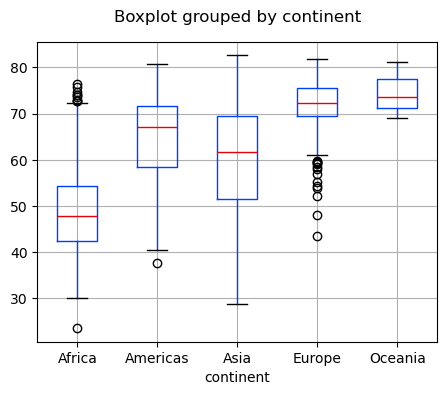

In [82]:
# For each continent
gap.boxplot(column=["lifeExp"], 
            by = "continent", 
            figsize = (5, 4)
           )

plt.title("");

Note the circles, which refer to outliers in the data.

# Scatterplot

Scatterplots are useful to show the relationships between two float/integer variables. Make a scatterplot with life expectancy on the x-axis and GDP per capita on the y-axis from the gapminder dataset.

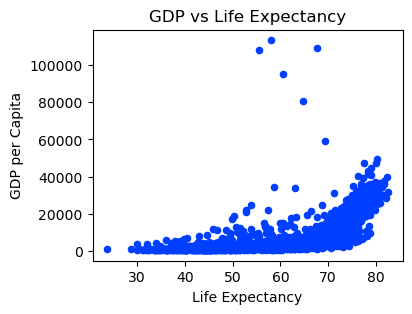

In [83]:
# Note the attribute-style syntax for calling the particular columns!
gap.plot.scatter(x = "lifeExp", 
                 y = "gdpPercap", 
                 figsize = (4, 3));
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.title("GDP vs Life Expectancy");

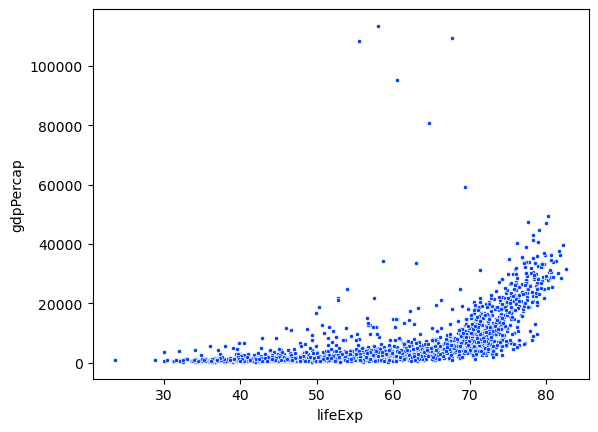

In [86]:
# We could have done this with seaborn as well
scatterplot = sns.scatterplot(data = gap, 
                               x = "lifeExp", 
                               y = "gdpPercap", 
                               marker = ".")

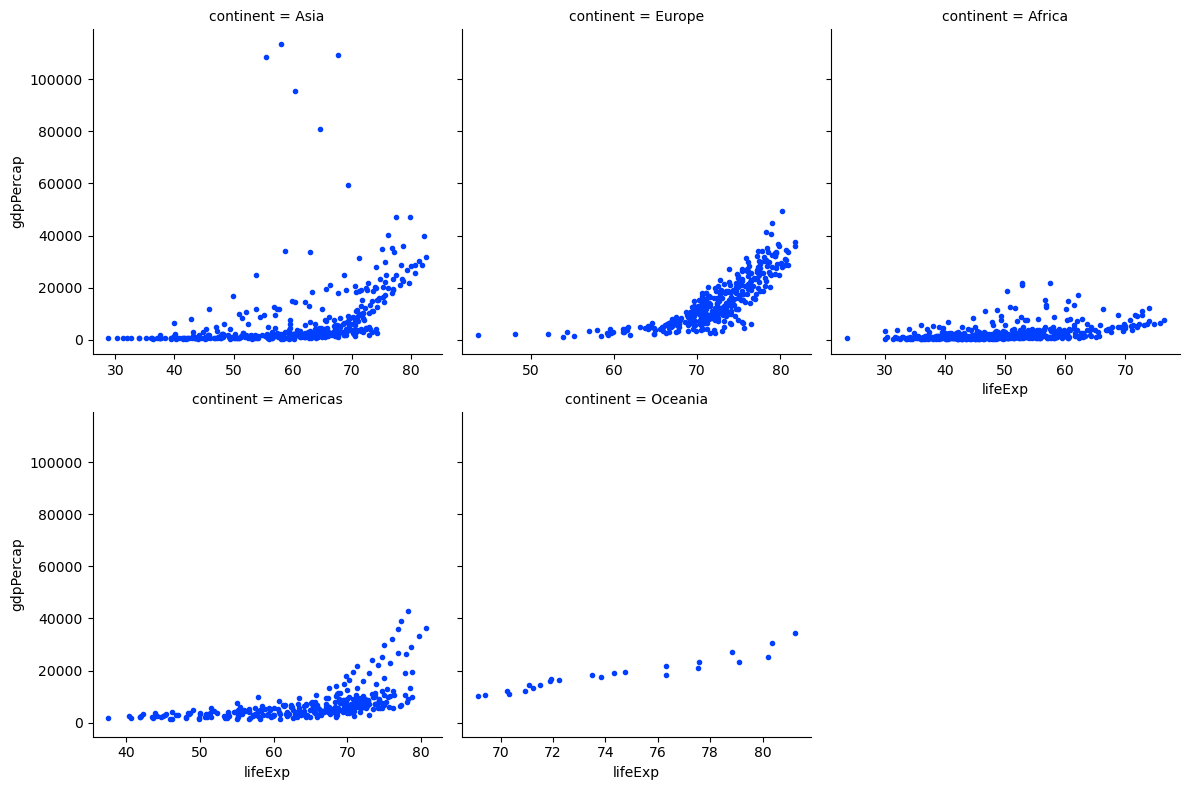

In [88]:
# An even more advanced option is to use seaborn's FacetGrid
# (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)
# This allows us to create a grid of plots based on a categorical variable
# In this case, we will create a grid of scatter plots for each continent

scatterplot_facet = sns.FacetGrid(gap, col = "continent", 
                                  col_wrap = 3, height = 4, sharex = False)
scatterplot_facet.map(plt.scatter, "lifeExp", "gdpPercap", marker = ".");

# Exporting Figures

You will want to export some figures to include in your presentations and other work. Add the `plt.savefig();` call as your last line of code! Remember: this will save to your working directory.

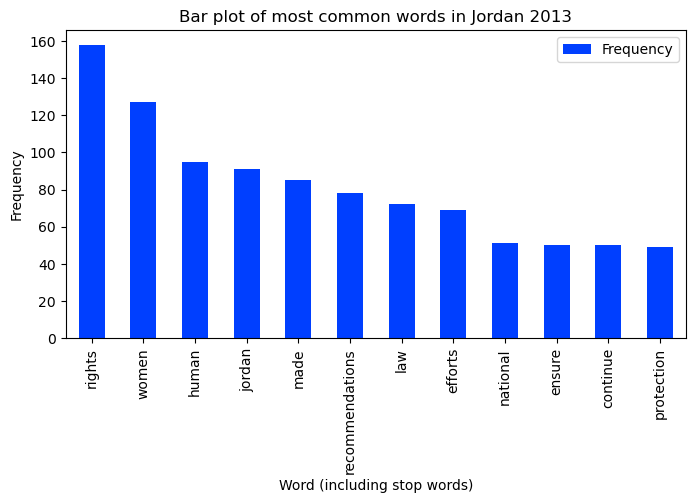

In [84]:
jordan_df_cleaned.plot.bar(x = "Word", y = "Frequency", figsize = (8,4))
plt.xlabel("Word (including stop words)")
plt.ylabel("Frequency")
plt.title("Bar plot of most common words in Jordan 2013")
plt.savefig("barplot_example.jpg", dpi = 100);